# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# 1. Read `tic-tac-toe.csv` into a dataframe.
tic_tac_toe = pd.read_csv('tic-tac-toe.csv')

In [3]:
# 1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
print(tic_tac_toe.shape)
tic_tac_toe.head(10)

(958, 10)


,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True
5,x,x,x,x,o,o,b,b,o,True
6,x,x,x,x,o,b,o,o,b,True
7,x,x,x,x,o,b,o,b,o,True
8,x,x,x,x,o,b,b,o,o,True
9,x,x,x,x,b,o,o,o,b,True


In [4]:
# Examining all data types (they should be categorical, but they need to be numerical to be fed to the model).
tic_tac_toe.dtypes

TL       object
TM       object
TR       object
ML       object
MM       object
MR       object
BL       object
BM       object
BR       object
class      bool
dtype: object

In [5]:
# 1. Convert the categorical values to numeric in all columns.
# I can use the LabelEncoder from scikit learn or I can use the pd.get_dummies in pandas.
# I will try both methods, just to see if there are differencies in results.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
tic_tac_toe_encoded = tic_tac_toe.apply(label_encoder.fit_transform)

In [6]:
tic_tac_toe_dummies = pd.get_dummies(tic_tac_toe, columns=tic_tac_toe.columns, drop_first=True)

In [7]:
print(tic_tac_toe_dummies.shape)
tic_tac_toe_dummies

(958, 19)


,TL_o,TL_x,TM_o,TM_x,TR_o,TR_x,ML_o,ML_x,MM_o,MM_x,MR_o,MR_x,BL_o,BL_x,BM_o,BM_x,BR_o,BR_x,class_True
0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1
1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1
2,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1
3,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1
4,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0
954,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0
955,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0
956,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0


In [8]:
print(tic_tac_toe_encoded.shape)
tic_tac_toe_encoded

(958, 10)


,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
953,1,2,2,2,1,1,1,2,2,0
954,1,2,1,2,2,1,2,1,2,0
955,1,2,1,2,1,2,2,1,2,0
956,1,2,1,1,2,2,2,1,2,0


In [9]:
# 1. Separate the inputs and output.
X_dummies = tic_tac_toe_dummies.drop('class_True', axis=1)
y_dummies = tic_tac_toe_dummies['class_True']

X_encoded = tic_tac_toe_encoded.drop('class', axis=1)
y_encoded = tic_tac_toe_encoded['class']

In [10]:
# 1. Normalize the input data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_encoded_scaled = scaler.fit_transform(X_encoded)
X_dummies_scaled = scaler.fit_transform(X_dummies)

In [11]:
print(X_encoded_scaled.shape)
X_encoded_scaled

(958, 9)


array([[ 1.00322257,  1.08495342,  1.00322257, ...,  1.00322257,
        -0.16731812, -0.28682739],
       [ 1.00322257,  1.08495342,  1.00322257, ..., -0.28682739,
         1.08495342, -0.28682739],
       [ 1.00322257,  1.08495342,  1.00322257, ..., -0.28682739,
        -0.16731812,  1.00322257],
       ...,
       [-0.28682739,  1.08495342, -0.28682739, ...,  1.00322257,
        -0.16731812,  1.00322257],
       [-0.28682739,  1.08495342, -0.28682739, ...,  1.00322257,
        -0.16731812,  1.00322257],
       [-0.28682739, -0.16731812,  1.00322257, ..., -0.28682739,
         1.08495342,  1.00322257]])

In [12]:
print(X_dummies_scaled.shape)
X_dummies_scaled

(958, 18)


array([[-0.73329442,  1.13660285, -0.72489841, ..., -0.80729433,
         1.36370873, -0.8798148 ],
       [-0.73329442,  1.13660285, -0.72489841, ...,  1.23870559,
         1.36370873, -0.8798148 ],
       [-0.73329442,  1.13660285, -0.72489841, ..., -0.80729433,
        -0.73329442,  1.13660285],
       ...,
       [ 1.36370873, -0.8798148 , -0.72489841, ..., -0.80729433,
        -0.73329442,  1.13660285],
       [ 1.36370873, -0.8798148 , -0.72489841, ..., -0.80729433,
        -0.73329442,  1.13660285],
       [ 1.36370873, -0.8798148 ,  1.37950364, ...,  1.23870559,
        -0.73329442,  1.13660285]])

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [13]:
# 1. Split in training in test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y_encoded, test_size=0.2, random_state=42)

In [14]:
X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(X_dummies_scaled, y_dummies, test_size=0.2, random_state=42)

In [15]:
# 2. Create a Sequential model
from tensorflow.keras.models import Sequential
model = Sequential()

In [16]:
# 3. Add several layers to your model. 
# Make sure you use ReLu as activation function for the middle layers. Use Softmax for the output layer.
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
# 4. Compile the model using adam as the optimizer and sparse_categorical_crossentropy as the loss function. For metrics use accuracy.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [18]:
# 5. Fit the training data (on the encoded df with LabelEncoder)
model.fit(X_train, y_train, epochs=3)

Epoch 1/3




24/24 [==============================] - 2s 4ms/step - loss: 1.3556 - accuracy: 0.6175
Epoch 2/3
24/24 [==============================] - 0s 4ms/step - loss: 0.6394 - accuracy: 0.6932
Epoch 3/3
24/24 [==============================] - 0s 3ms/step - loss: 0.5549 - accuracy: 0.7311


In [19]:
# I tried to fit the same model to the df that was processed with pd.get_dummies, but I had to modify the model's structure.
# I had to specify the input_shape as the number of features we feed to the model (18), to avoid getting a ValueError this time.

# Assuming X_train_dummies is your training data after one-hot encoding
input_dim = X_train_dummies.shape[1]

# Create a Sequential model
model2 = tf.keras.models.Sequential()

# Add a Dense layer with the correct input shape
model2.add(tf.keras.layers.Flatten(input_shape=(input_dim,)))
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 9)                 0         
                                                                 
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 19082 (74.54 KB)
Trainable params: 19082 (74.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 18)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               2432      
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 20234 (79.04 KB)
Trainable params: 20234 (79.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# 5. Fit the training data (on the encoded df with pd.get_dummies)
model2.fit(X_train_dummies, y_train_dummies, epochs=3)

Epoch 1/3


24/24 [==============================] - 1s 4ms/step - loss: 1.3778 - accuracy: 0.5627
Epoch 2/3
24/24 [==============================] - 0s 4ms/step - loss: 0.5515 - accuracy: 0.7298
Epoch 3/3
24/24 [==============================] - 0s 3ms/step - loss: 0.4442 - accuracy: 0.7924


In [23]:
# 6. Evaluate your neural networks models with the test data.

# first model
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# second model
val_loss2, val_acc2 = model2.evaluate(X_test_dummies, y_test_dummies)
print("Validation Loss (Model 2):", val_loss2)
print("Validation Accuracy (Model 2):", val_acc2)


6/6 [==============================] - 0s 4ms/step - loss: 0.5801 - accuracy: 0.7188
Validation Loss: 0.5801398754119873
Validation Accuracy: 0.71875
6/6 [==============================] - 0s 4ms/step - loss: 0.4323 - accuracy: 0.8073
Validation Loss (Model 2): 0.43232178688049316
Validation Accuracy (Model 2): 0.8072916865348816


In [24]:
# 7. Save your model(s)
model.save('tic-tac-toe.model')
model2.save('tic_tac_toe,model2')

INFO:tensorflow:Assets written to: tic-tac-toe.model\assets


INFO:tensorflow:Assets written to: tic-tac-toe.model\assets


INFO:tensorflow:Assets written to: tic_tac_toe,model2\assets


INFO:tensorflow:Assets written to: tic_tac_toe,model2\assets


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [25]:
# loading the (first) Sequential model
model = tf.keras.models.load_model('tic-tac-toe.model')

# checking that X_test and y_test have the same number of rows
print(pd.DataFrame(X_test).shape)
print(pd.DataFrame(y_test).shape)

(192, 9)
(192, 1)


In [26]:
X_test_df = pd.DataFrame(X_test)
X_test_df

,0,1,2,3,4,5,6,7,8
0,-0.286827,-0.167318,-0.286827,-1.419590,0.930371,1.084953,1.003223,-0.167318,1.003223
1,-0.286827,-1.419590,-1.576877,1.084953,0.930371,1.084953,-1.576877,-1.419590,-0.286827
2,-0.286827,1.084953,-1.576877,1.084953,0.930371,-1.419590,-0.286827,1.084953,-0.286827
3,-1.576877,1.084953,-0.286827,1.084953,0.930371,-0.167318,1.003223,-0.167318,-0.286827
4,-0.286827,-1.419590,1.003223,1.084953,-0.420077,-1.419590,-1.576877,1.084953,-0.286827
...,...,...,...,...,...,...,...,...,...
187,-0.286827,-1.419590,-0.286827,1.084953,0.930371,1.084953,-1.576877,1.084953,-0.286827
188,1.003223,-0.167318,1.003223,1.084953,-0.420077,1.084953,-0.286827,-0.167318,-1.576877
189,1.003223,1.084953,1.003223,-0.167318,-0.420077,-1.419590,-1.576877,-1.419590,-1.576877
190,1.003223,1.084953,1.003223,-0.167318,-0.420077,-1.419590,-1.576877,1.084953,-0.286827


In [27]:
y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(inplace=True)
y_test_df.drop(columns={'index'}, inplace=True)
y_test_df

,class
0,0
1,1
2,1
3,0
4,0
...,...
187,1
188,0
189,1
190,1


In [28]:
test_df =  pd.concat([X_test_df, y_test_df], axis=1)
test_df

,0,1,2,3,4,5,6,7,8,class
0,-0.286827,-0.167318,-0.286827,-1.419590,0.930371,1.084953,1.003223,-0.167318,1.003223,0
1,-0.286827,-1.419590,-1.576877,1.084953,0.930371,1.084953,-1.576877,-1.419590,-0.286827,1
2,-0.286827,1.084953,-1.576877,1.084953,0.930371,-1.419590,-0.286827,1.084953,-0.286827,1
3,-1.576877,1.084953,-0.286827,1.084953,0.930371,-0.167318,1.003223,-0.167318,-0.286827,0
4,-0.286827,-1.419590,1.003223,1.084953,-0.420077,-1.419590,-1.576877,1.084953,-0.286827,0
...,...,...,...,...,...,...,...,...,...,...
187,-0.286827,-1.419590,-0.286827,1.084953,0.930371,1.084953,-1.576877,1.084953,-0.286827,1
188,1.003223,-0.167318,1.003223,1.084953,-0.420077,1.084953,-0.286827,-0.167318,-1.576877,0
189,1.003223,1.084953,1.003223,-0.167318,-0.420077,-1.419590,-1.576877,-1.419590,-1.576877,1
190,1.003223,1.084953,1.003223,-0.167318,-0.420077,-1.419590,-1.576877,1.084953,-0.286827,1


In [29]:
# selecting a sample from the test df
test_sample = test_df.sample(30)

X_test_sample = test_sample.drop('class', axis=1)
y_test_sample = test_sample['class']

# making predictions using the loaded model
predictions = model.predict(X_test_sample)
predictions

1/1 [==============================] - 0s 333ms/step


array([[1.67668417e-01, 8.30851316e-01, 2.09985272e-04, 8.64769463e-05,
        4.39906900e-04, 3.64612701e-04, 7.95956075e-05, 1.19791672e-04,
        5.74968471e-05, 1.22450379e-04],
       [5.62361240e-01, 4.20086294e-01, 2.76552048e-03, 1.72342174e-03,
        2.42862757e-03, 3.69556784e-03, 1.89471093e-03, 2.15435633e-03,
        1.06723665e-03, 1.82290620e-03],
       [4.49074119e-01, 5.44490099e-01, 9.16596036e-04, 3.78056604e-04,
        1.24565908e-03, 1.53283589e-03, 6.01168547e-04, 4.42489545e-04,
        4.54024965e-04, 8.65007227e-04],
       [6.83746576e-01, 3.02643418e-01, 2.47412687e-03, 1.13034155e-03,
        2.45129014e-03, 2.69007380e-03, 1.41021586e-03, 1.45419291e-03,
        7.78365938e-04, 1.22147985e-03],
       [2.98135370e-01, 6.97373152e-01, 7.18695985e-04, 4.12383670e-04,
        8.78392602e-04, 9.11885407e-04, 4.96585097e-04, 4.07530897e-04,
        2.44884694e-04, 4.21053788e-04],
       [3.35233867e-01, 6.61323190e-01, 4.32937901e-04, 2.61046487e-04,
   

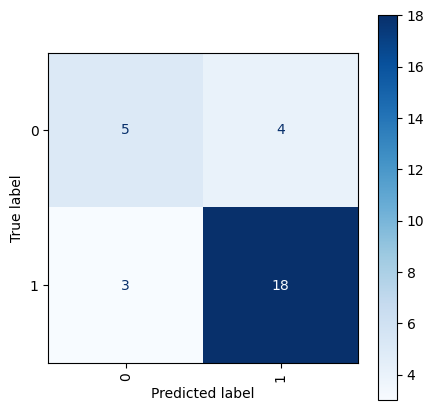

              precision    recall  f1-score    support
0              0.625000  0.555556  0.588235   9.000000
1              0.818182  0.857143  0.837209  21.000000
accuracy       0.766667  0.766667  0.766667   0.766667
macro avg      0.721591  0.706349  0.712722  30.000000
weighted avg   0.760227  0.766667  0.762517  30.000000


In [30]:
# converting the predictions to class labels by computing the probabilities of class 1 or 0
pred_labels = np.argmax(predictions, axis=1)  

# computing the confusion matrix
cm = confusion_matrix(y_test_sample, pred_labels)

# defining class names - values of the target column [0, 1]
class_names = y_test_df['class'].unique()

# plotting the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))  # Increase the size of the figure
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
plt.show()

sns.set(font_scale=1.5)
report = classification_report(y_test_sample, pred_labels, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# report as a dataframe
print(df_report)

## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [31]:
# Add more layers to the model
model = tf.keras.models.load_model('tic-tac-toe.model')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 9)                 0         
                                                                 
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 19082 (74.54 KB)
Trainable params: 19082 (74.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# creating a new model by copying all layers up to the last one
new_model = tf.keras.Sequential(model.layers[:-1])

# adding the modified dense layer to the new model and the final output layer as before
new_model.add(tf.keras.layers.Dense(units=64, activation='relu', name='modified_dense'))
new_model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Build the new model
new_model.build(input_shape=model.layers[0].input_shape)

# Display the updated model summary
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 9)                 0         
                                                                 
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 modified_dense (Dense)      (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 26698 (104.29 KB)
Trainable params: 26698 (104.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Compile the model
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
new_model.fit(X_train, y_train, epochs=3)

Epoch 1/3
24/24 [==============================] - 2s 4ms/step - loss: 1.2418 - accuracy: 0.5457
Epoch 2/3
24/24 [==============================] - 0s 5ms/step - loss: 0.5944 - accuracy: 0.7063
Epoch 3/3
24/24 [==============================] - 0s 4ms/step - loss: 0.5423 - accuracy: 0.7480


In [35]:
# adding an extra hidden layer increases the accuracy.
# The evaluation for our first istance of 'model' was worse than this.
new_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5457 - accuracy: 0.7500


[0.5456849932670593, 0.75]

In [36]:
# Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want.
# Then pass the instance to `model.compile` as the optimizer.
models = tf.keras.models.load_model('tic-tac-toe.model')

# Define a list of learning rates to test
learning_rates_to_test = [0.001, 0.01, 0.1, 0.3, 0.5]

# Iterate over each learning rate
for learning_rate in learning_rates_to_test:
    
    custom_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=3)
    evaluation_results = model.evaluate(X_test, y_test)

    print(f"Learning Rate: {learning_rate}, Accuracy: {evaluation_results}")


Epoch 1/3
24/24 [==============================] - 1s 3ms/step - loss: 0.5161 - accuracy: 0.7585
Epoch 2/3
24/24 [==============================] - 0s 3ms/step - loss: 0.4649 - accuracy: 0.7977
Epoch 3/3
6/6 [==============================] - 0s 397us/step - loss: 0.4719 - accuracy: 0.7969
Learning Rate: 0.001, Accuracy: [0.471912145614624, 0.796875]
Epoch 1/3
24/24 [==============================] - 2s 4ms/step - loss: 0.5711 - accuracy: 0.7298
Epoch 2/3
24/24 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8433
Epoch 3/3
6/6 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.7917
Learning Rate: 0.01, Accuracy: [0.4489932954311371, 0.7916666865348816]
Epoch 1/3
24/24 [==============================] - 2s 3ms/step - loss: 2.0843 - accuracy: 0.6136
Epoch 2/3
24/24 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.6919
Epoch 3/3
6/6 [==============================] - 1s 3ms/step - loss: 0.4436 - accuracy: 0.82

In [37]:
# The best learning rate are the lowest ones (from 0.001 to 0.1).

In [38]:
# Adjust the number of epochs when you fit the training data to the model. 
# Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.
# Define a list of learning rates to test
model = tf.keras.models.load_model('tic-tac-toe.model')

epochs_to_test = [3, 5, 8, 11, 14]

# Iterate over each learning rate
for epoch in epochs_to_test:
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epoch)
    evaluation_results = model.evaluate(X_test, y_test)

    print(f"Epoch: {epoch}, Accuracy: {evaluation_results}")


Epoch 1/3
24/24 [==============================] - 2s 3ms/step - loss: 0.5202 - accuracy: 0.7676
Epoch 2/3
24/24 [==============================] - 0s 4ms/step - loss: 0.4808 - accuracy: 0.7885
Epoch 3/3
6/6 [==============================] - 0s 4ms/step - loss: 0.4837 - accuracy: 0.7865
Epoch: 3, Accuracy: [0.4837433397769928, 0.7864583134651184]
Epoch 1/5
24/24 [==============================] - 1s 3ms/step - loss: 0.4077 - accuracy: 0.8342
Epoch 2/5
24/24 [==============================] - 0s 5ms/step - loss: 0.3811 - accuracy: 0.8590
Epoch 3/5
24/24 [==============================] - 0s 3ms/step - loss: 0.3586 - accuracy: 0.8629
Epoch 4/5
24/24 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8956
Epoch 5/5
6/6 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8021
Epoch: 5, Accuracy: [0.404144287109375, 0.8020833134651184]
Epoch 1/8
24/24 [==============================] - 1s 3ms/step - loss: 0.3024 - accuracy: 0.8982
Epoch 2/8


In [39]:
# the best accuracy was for epoch=14 - more the epochs, more the accuracy.

**Which approach(es) did you find helpful to improve your model performance?**

In [40]:
# All approaches gave some results. Increasing epochs and decreasing the learning rate is good for accuracy, but not good for computational power (in this case the dataset is small and easy to process, so we don't see the disadvantages, but in most scenarios it will be a problem).
# It also can lead to overfitting, so it would be wise to check how the model performs with a separate test set (here we did not split in train, validation and test, but only in train and test).